In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [10]:
# Create random data using NumPy
np.random.seed(42)

# Features: Age, Salary
ages = np.random.randint(20, 60, 100)
salaries = np.random.randint(30000, 90000, 100)

# Target: 0 = Not Approved, 1 = Approved (based on a simple rule for demo)
loan_status = (ages > 35).astype(int)

# Create DataFrame
df = pd.DataFrame({
    'Age': ages,
    'Salary': salaries,
    'Loan_Status': loan_status
})

# Preview dataset
print(df.head())


   Age  Salary  Loan_Status
0   58   53599            1
1   48   65222            1
2   34   41837            0
3   27   44039            0
4   40   88148            1


In [11]:
print(df.describe())
print(df.info())


              Age       Salary  Loan_Status
count  100.000000    100.00000    100.00000
mean    38.790000  60879.97000      0.57000
std     11.556008  17931.68244      0.49757
min     20.000000  30206.00000      0.00000
25%     28.000000  46075.25000      0.00000
50%     39.500000  59595.00000      1.00000
75%     47.250000  77962.50000      1.00000
max     59.000000  89581.00000      1.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          100 non-null    int64
 1   Salary       100 non-null    int64
 2   Loan_Status  100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB
None


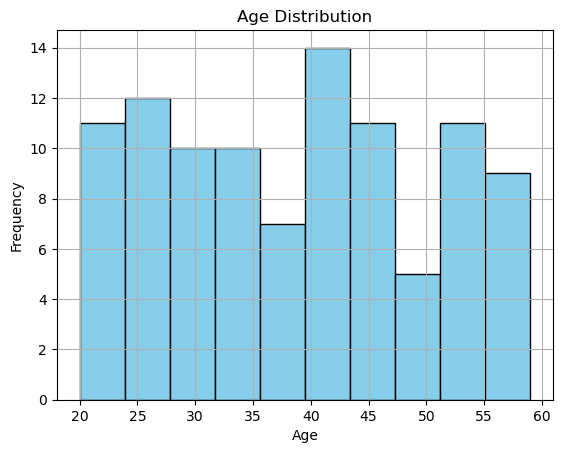

In [12]:
# Histogram for Age
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


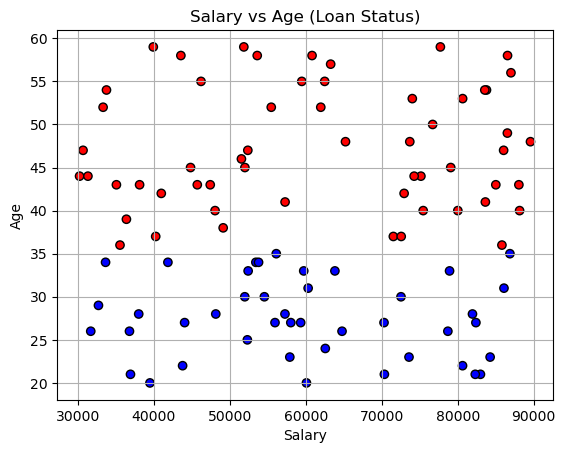

In [13]:
# Scatter plot: Salary vs Age
plt.scatter(df['Salary'], df['Age'], c=df['Loan_Status'], cmap='bwr', edgecolor='black')
plt.title('Salary vs Age (Loan Status)')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.grid(True)
plt.show()

In [14]:
X = df[['Age', 'Salary']]
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (80, 2)
Test shape: (20, 2)


In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[ 9  0]
 [ 0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

